# Lets Create Some Random Graphs

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

In [2]:
def generarGrafoPesosNormales(f, c, mu=5, sigma=1, p_arista=0.5):
    assert(f<=c)

    grafo = []
    verticesUsados = []
    aristasUsadas = []

    # Genera un grafo minimal con respecto a que cualquier cliente
    # sea alcanzable desde al menos una fábrica.

    for cliente in range(f+1, f+c+1):
        # Se asegura de que cada cliente sea adyacente a una fábrica
        # o a otro cliente tal que hay un camino entre él y una fábrica.
        vecino = np.random.choice([i for i in range(1,f+1)] + verticesUsados)
        verticesUsados.append(cliente)
        l, r = min(cliente, vecino), max(cliente, vecino)
        grafo.append([ l, r, int(max(np.random.normal(mu, sigma), 0)) ])
        aristasUsadas.append((l,r))

    # Agrega más aristas con probabilidad p_arista.
    # Cada una es independiente.

    for i in range(1, f+c+1):
        for j in range(i+1, f+c+1):
            if not((i,j) in aristasUsadas):
                p = np.random.uniform()
                if p <= p_arista:
                    grafo.append([ i, j, int(max(np.random.normal(mu, sigma), 0)) ])

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafo ]

    return grafoStr

def generarEntradaPropClientes(n, mu=5, sigma=1, p_arista=0.5, archivo="output"):
    # Genera un caso de test con 32 grafos de n nodos. Los pesos están distribuidos
    # normalmente según los parámetros especificados.
    minimo = n // 2 if n%2 == 0 else n // 2 + 1

    with open(archivo, 'w') as entrada:
        for k in range(minimo,n):    
            for i in range(50):
                grafo = generarGrafoPesosNormales(n-k, k, mu, sigma, p_arista)
                entrada.write(str(n-k) + " " + str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')

        entrada.write("0\n")
        
def generarEntradaCantidadesFijas(f, c, mu=5, sigma=1, archivo="output"):
    # Genera un caso de test con 32 grafos de n nodos. Los pesos están distribuidos
    # normalmente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for p in np.arange(0.0, 1.1, 0.05):
            for i in range(80):
                grafo = generarGrafoPesosNormales(f, c, mu, sigma, p)
                entrada.write(str(f) + " " + str(c) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0\n")

In [3]:
for p in np.arange(0.0, 1.1, 0.25):
    generarEntradaPropClientes(50, 20, 5, p, "tests/proporcionClientes_{0}.test-in".format(p))

In [4]:
for j in range(10, 40, 10):
    generarEntradaCantidadesFijas(j, j+10, 20, 5, "tests/densidadCreciente_{0}_{1}.test-in".format(j, j+10))

In [5]:
for p in np.arange(0.0, 1.1, 0.25):
    generarEntradaPropClientes(50, 20, 5, p, "tests/ccreciente_{0}.test-in".format(p))

# Corremos el experimento

In [6]:
! make expe

In [12]:
results = {}

for p in np.arange(0.0, 1.1, 0.25):
    results["proporcionClientes_{0}".format(p)] = pd.read_csv("./experimentacion/proporcionClientes_{0}.stderr".format(p), delimiter=";")


In [13]:
results["proporcionClientes_0.25"].tail()

,Cantidad de fabricas,Cantidad de clientes,Cantidad de rutas,Tiempo de ejecucion,Tamaño de la solucion
1245,1,49,333,0.000103,49
1246,1,49,329,0.000106,49
1247,1,49,348,0.000106,49
1248,1,49,360,0.000108,49
1249,1,49,336,0.000108,49


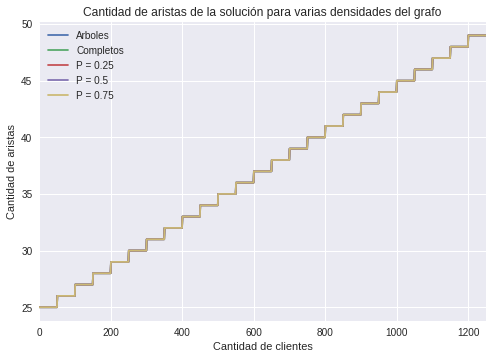

In [14]:
df = pd.DataFrame({'Arboles': results["proporcionClientes_0.0"]['Tamaño de la solucion'],
                  'P = 0.25': results["proporcionClientes_0.25"]['Tamaño de la solucion'],
                  'P = 0.5': results["proporcionClientes_0.5"]['Tamaño de la solucion'],
                  'P = 0.75': results["proporcionClientes_0.75"]['Tamaño de la solucion'],
                  'Completos': results["proporcionClientes_1.0"]['Tamaño de la solucion']})

ax = df.plot(logy=False)
ax.set_ylabel(u"Cantidad de aristas")
ax.set_xlabel(u"Cantidad de clientes")

plt.title(u"Cantidad de aristas de la solución para varias densidades del grafo")
plt.show()

## Experimento 6

In [15]:
resultsD = {}
    
for j in range(10, 40, 10):
    resultsD["densidadCreciente_{0}_{1}".format(j, j+10)] = pd.read_csv("./experimentacion/densidadCreciente_{0}_{1}.stderr".format(j, j+10), delimiter=";")


In [16]:
resultsD["densidadCreciente_30_40"].tail()

,Cantidad de fabricas,Cantidad de clientes,Cantidad de rutas,Tiempo de ejecucion,Tamaño de la solucion
1755,30,40,2415,0.000676,40
1756,30,40,2415,0.000678,40
1757,30,40,2415,0.000678,40
1758,30,40,2415,0.000681,40
1759,30,40,2415,0.000686,40


In [17]:
for key, value in resultsD.items():
    resultsD[key] = value.groupby("Cantidad de rutas").mean()

resultsD["densidadCreciente_30_40"]

,Cantidad de fabricas,Cantidad de clientes,Tiempo de ejecucion,Tamaño de la solucion
Cantidad de rutas,,,,
40,30,40,0.000017,40
133,30,40,0.000041,40
137,30,40,0.000042,40
138,30,40,0.000042,40
139,30,40,0.000042,40
143,30,40,0.000043,40
144,30,40,0.000042,40
145,30,40,0.000044,40
146,30,40,0.000045,40


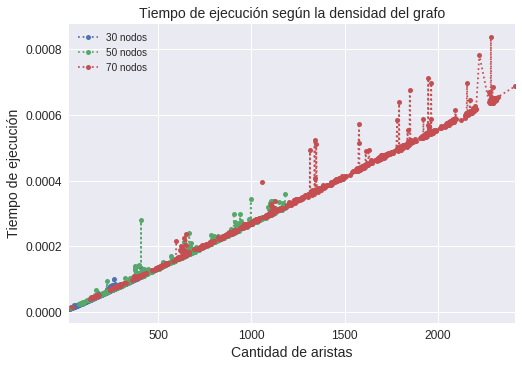

In [18]:
df = pd.DataFrame({'30 nodos': resultsD["densidadCreciente_10_20"]['Tiempo de ejecucion'],
                  '50 nodos': resultsD["densidadCreciente_20_30"]['Tiempo de ejecucion'],
                  '70 nodos': resultsD["densidadCreciente_30_40"]['Tiempo de ejecucion']})

ax = df.plot(logy=False, fontsize=12, marker='o', markersize=5, linestyle=':')
ax.set_ylabel(u"Tiempo de ejecución", fontsize=14)
ax.set_xlabel(u"Cantidad de aristas", fontsize=14)

plt.title(u"Tiempo de ejecución según la densidad del grafo", fontsize=14)
plt.show()

### C creciente

In [19]:
resultsC = {}
for p in np.arange(0.0, 1.1, 0.25):
    resultsC["ccreciente_{0}".format(p)] = pd.read_csv("experimentacion/ccreciente_{0}.stderr".format(p), delimiter=";")

In [20]:
resultsC["ccreciente_0.0"]

,Cantidad de fabricas,Cantidad de clientes,Cantidad de rutas,Tiempo de ejecucion,Tamaño de la solucion
0,25,25,25,0.000012,25
1,25,25,25,0.000011,25
2,25,25,25,0.000011,25
3,25,25,25,0.000011,25
4,25,25,25,0.000010,25
5,25,25,25,0.000011,25
6,25,25,25,0.000011,25
7,25,25,25,0.000011,25
8,25,25,25,0.000010,25
9,25,25,25,0.000011,25


In [117]:
for key, value in resultsC.items():
    resultsC[key] = value.groupby("Cantidad de clientes").mean()
    
resultsC["ccreciente_0.0"]

,Cantidad de fabricas,Cantidad de rutas,Tiempo de ejecucion,Tamaño de la solucion
Cantidad de clientes,,,,
25,25,25,0.000014,25
26,24,26,0.000014,26
27,23,27,0.000015,27
28,22,28,0.000015,28
29,21,29,0.000017,29
30,20,30,0.000016,30
31,19,31,0.000016,31
32,18,32,0.000017,32
33,17,33,0.000018,33


In [123]:
df = pd.DataFrame({'Arboles': resultsC["ccreciente_0.0"]['Tiempo de ejecucion'],
                  'P = 0.25': resultsC["ccreciente_0.25"]['Tiempo de ejecucion'],
                  'P = 0.5': resultsC["ccreciente_0.5"]['Tiempo de ejecucion'],
                  'P = 0.75': resultsC["ccreciente_0.75"]['Tiempo de ejecucion'],
                  'Completos': resultsC["ccreciente_1.0"]['Tiempo de ejecucion']})

ax = df.plot(logy=False)
ax.set_ylabel(u"Tiempo de ejecución en segundos")
ax.set_xlabel(u"Cantidad de clientes")

plt.title(u"Tiempo de ejecución según la cantidad de clientes")
plt.show()

## Contraste con la complejidad teórica

Necesitamos un Pearson que muestre la correlación entre la complejidad empírica y O(R log(C)). 

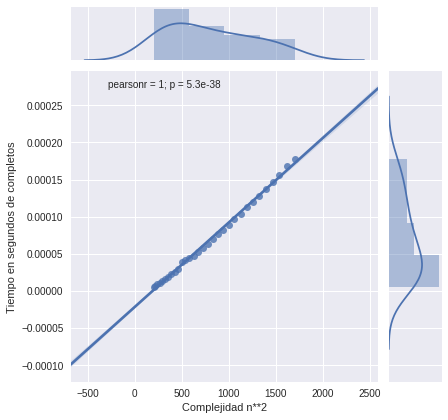

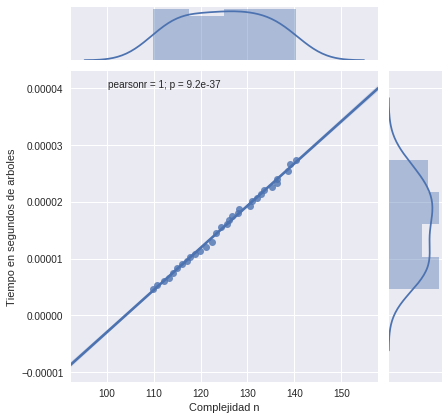

In [159]:
sns.jointplot(dfComp['Complejidad n**2'], dfComp['Tiempo en segundos de completos'], kind="reg")
sns.jointplot(dfComp['Complejidad n'], dfComp['Tiempo en segundos de arboles'], kind="reg")


plt.show()

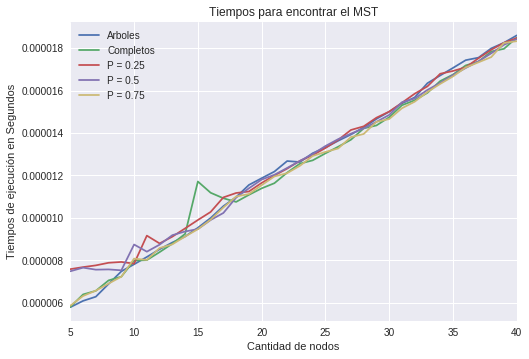

In [160]:
dfRoot = pd.DataFrame({'Arboles': results["dfNormal_0.0"]['Tiempo calculando raiz'],
                  'P = 0.25': results["dfNormal_0.25"]['Tiempo calculando raiz'],
                  'P = 0.5': results["dfNormal_0.5"]['Tiempo calculando raiz'],
                  'P = 0.75': results["dfNormal_0.75"]['Tiempo calculando raiz'],
                  'Completos': results["dfNormal_1.0"]['Tiempo calculando raiz']})

ax = dfRoot.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
ax.set_xlabel("Cantidad de nodos")

plt.title("Tiempos para encontrar el MST")
plt.show()

In [163]:
dfComp = pd.DataFrame()
dfComp['Cantidad de Nodos'] = results["dfNormal_1.0"].index.values
dfComp['Complejidad n**2'] = [100 + random.normalvariate(n**2,2) for n in results["dfNormal_0.0"].index.values]
dfComp['Complejidad n'] = [100 + random.normalvariate(n,0.3) for n in results["dfNormal_0.0"].index.values]

dfComp['Tiempo de encontrar raiz en segundos de ex-completos'] =  results["dfNormal_1.0"]['Tiempo calculando raiz']
dfComp['Tiempo de encontrar raiz en segundos de arboles'] =  results["dfNormal_0.0"]['Tiempo calculando raiz']
plt.clf()
correlation = dfComp.corr()
correlation

,Cantidad de Nodos,Complejidad n**2,Complejidad n,Tiempo de encontrar raiz en segundos de ex-completos,Tiempo de encontrar raiz en segundos de arboles
Cantidad de Nodos,1.000000,0.979279,0.999670,0.989304,0.998206
Complejidad n**2,0.979279,1.000000,0.978676,0.970244,0.980576
Complejidad n,0.999670,0.978676,1.000000,0.988351,0.997675
Tiempo de encontrar raiz en segundos de ex-completos,0.989304,0.970244,0.988351,1.000000,0.988109
Tiempo de encontrar raiz en segundos de arboles,0.998206,0.980576,0.997675,0.988109,1.000000


In [36]:
sns.jointplot(dfComp['Complejidad n'], dfComp['Tiempo de encontrar raiz en segundos de ex-completos'], kind="reg")
sns.jointplot(dfComp['Complejidad n'], dfComp['Tiempo de encontrar raiz en segundos de arboles'], kind="reg")

plt.show()

NameError: name 'dfComp' is not defined

# Super Test

In [24]:
with open("tests/rlogc.test-in", 'w') as entrada:
    for c in range(5,21):
        for p in np.arange(0.0, 1.1, 0.01):
            for i in range(80):
                grafo = generarGrafoPesosNormales(5, c, 20, 5, p)
                entrada.write("5 " + str(c) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
    entrada.write("0\n")

In [23]:
!make expe

In [56]:
results = {}

dfRlogc = pd.read_csv("./experimentacion/rlogc.stderr", delimiter=";")
dfRlogc2 = dfRlogc
dfRlogc

,Cantidad de fabricas,Cantidad de clientes,Cantidad de rutas,Tiempo de ejecucion,Tamaño de la solucion
0,5,5,5,0.000007,5
1,5,5,5,0.000006,5
2,5,5,5,0.000005,5
3,5,5,5,0.000005,5
4,5,5,5,0.000005,5
5,5,5,5,0.000005,5
6,5,5,5,0.000004,5
7,5,5,5,0.000005,5
8,5,5,5,0.000005,5
9,5,5,5,0.000005,5


In [57]:
dfRlogc = dfRlogc.groupby(["Cantidad de rutas", "Cantidad de clientes"]).mean()
dfRlogc

Cantidad de fabricas  \
Cantidad de rutas Cantidad de clientes                         
5                 5                                        5   
6                 5                                        5   
                  6                                        5   
7                 5                                        5   
                  6                                        5   
                  7                                        5   
8                 5                                        5   
                  6                                        5   
                  7                                        5   
                  8                                        5   
9                 5                                        5   
                  6                                        5   
                  7                                        5   
                  8                                        5   
                  9                                        5   
10                5                                        5   
                  6                                        5   
                  7                                        5   
                  8                                        5   
                  9                                        5   
                  10                                       5   
11                5                                        5   
                  6                                        5   
                  7                                        5   
                  8                                        5   
                  9                                        5   
                  10                                       5   
                  11                                       5   
12                5                                        5   
                  6                                        5   
...                                                      ...   
274               19                                       5   
                  20                                       5   
275               19                                       5   
                  20                                       5   
276               19                                       5   
                  20                                       5   
277               20                                       5   
278               20                                       5   
279               20                                       5   
280               20                                       5   
281               20                                       5   
282               20                                       5   
283               20                                       5   
284               20                                       5   
285               20                                       5   
286               20                                       5   
287               20                                       5   
288               20                                       5   
289               20                                       5   
290               20                                       5   
291               20                                       5   
292               20                                       5   
293               20                                       5   
294               20                                       5   
295               20                                       5   
296               20                                       5   
297               20                                       5   
298               20                                       5   
299               20                                       5   
300               20                                       5   

       

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [60]:
dfPlot = dfRlogc["Tiempo de ejecucion"]

# threedee = plt.figure().gca(projection='3d')
# threedee.scatter(dfRlogc2["Cantidad de rutas"], dfRlogc2["Cantidad de clientes"], dfRlogc["Tiempo de ejecucion"])
# threedee.set_xlabel('Index')
# threedee.set_ylabel('H-L')
# threedee.set_zlabel('Close')
# plt.show()

dfRlogc2

,Cantidad de fabricas,Cantidad de clientes,Cantidad de rutas,Tiempo de ejecucion,Tamaño de la solucion
0,5,5,5,0.000007,5
1,5,5,5,0.000006,5
2,5,5,5,0.000005,5
3,5,5,5,0.000005,5
4,5,5,5,0.000005,5
5,5,5,5,0.000005,5
6,5,5,5,0.000004,5
7,5,5,5,0.000005,5
8,5,5,5,0.000005,5
9,5,5,5,0.000005,5


In [33]:
dfRlogc = dfRlogc.groupby("Cantidad de rutas")

dfComp = pd.DataFrame()
dfComp['Cantidad de Nodos'] = results["dfNormal_1.0"].index.values
dfComp['Complejidad n**2'] = [100 + random.normalvariate(n**2,2) for n in results["dfNormal_0.0"].index.values]
dfComp['Complejidad n'] = [100 + random.normalvariate(n,0.3) for n in results["dfNormal_0.0"].index.values]

dfComp['Tiempo de ejecucion'] =  dfRlogc['Tiempo de ejeucion']
dfComp['Tiempo de encontrar raiz en segundos de arboles'] =  results["dfNormal_0.0"]['Tiempo calculando raiz']
plt.clf()
correlation = dfComp.corr()
correlation

KeyError: 'dfNormal_1.0'